In [0]:
import tensorflow as tf

In [2]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 421.8MB 44kB/s 
     |████████████████████████████████| 3.8MB 37.6MB/s 
     |████████████████████████████████| 450kB 65.8MB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [3]:
print(tf.__version__)

2.1.0


In [0]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models,layers,optimizers,utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [5]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [7]:
print(len(train_data))
print(len(test_data))

8982
2246


In [8]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [9]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [10]:
train_labels[10]

3

In [14]:
train_data.shape

(8982,)

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [0]:
vectorized_traindata = vectorize_sequences(train_data)
vectorized_testdata = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
results = np.zeros((len(labels), dimension))
for i, label in enumerate(labels):
results[i, label] = 1.
return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# **OR**

In [18]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Using TensorFlow backend.


In [0]:
x_val = vectorized_traindata[:1000]
remaining_traindata = vectorized_traindata[1000:]
y_val = one_hot_train_labels[:1000]
remaining_trainlabels = one_hot_train_labels[1000:]

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(remaining_traindata, remaining_trainlabels, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 0s 47us/sample - loss: 0.0603 - accuracy: 0.9610 - val_loss: 2.2886 - val_accuracy: 0.7790
Epoch 2/20
7982/7982 [==============================] - 0s 45us/sample - loss: 0.0595 - accuracy: 0.9589 - val_loss: 2.3265 - val_accuracy: 0.7760
Epoch 3/20
7982/7982 [==============================] - 0s 44us/sample - loss: 0.0576 - accuracy: 0.9614 - val_loss: 2.5600 - val_accuracy: 0.7710
Epoch 4/20
7982/7982 [==============================] - 0s 47us/sample - loss: 0.0576 - accuracy: 0.9602 - val_loss: 2.4877 - val_accuracy: 0.7600
Epoch 5/20
7982/7982 [==============================] - 0s 49us/sample - loss: 0.0588 - accuracy: 0.9607 - val_loss: 2.5512 - val_accuracy: 0.7650
Epoch 6/20
7982/7982 [==============================] - 0s 44us/sample - loss: 0.0580 - accuracy: 0.9612 - val_loss: 2.7370 - val_accuracy: 0.7630
Epoch 7/20
7982/7982 [==============================] - 0s 43us/sample

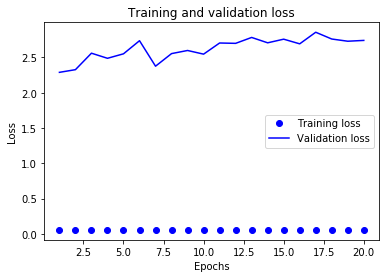

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

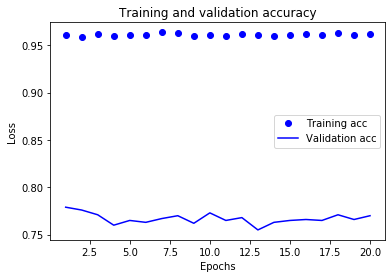

In [44]:
plt.clf() #Clears the figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
prediction = model.predict(vectorized_testdata)

In [26]:
prediction.shape

(2246, 46)

In [37]:
prediction[1].sum()

1.0

In [38]:
prediction[0].argmax()

3